In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import json
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [11]:
login.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


No null datas, so thats good to proceed

## Aggregating the login counts on 15-minute intervals

In [12]:
login.set_index('login_time', inplace=True, drop=False)
login['count']=1
login =login.resample('15T').sum()
login.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [14]:
login['login_time']=login.index
login.head()

,count,login_time
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


## To further describe the patterns/daily cycles of the demand: 

- weekday, date and time as well as week of the year
- login_time is broken down to year, month, and hour


In [25]:
login['day'] = login['login_time'].dt.weekday
login['date'] = login['login_time'].dt.date
login['time'] = login['login_time'].dt.time
login['week'] = login['login_time'].dt.weekofyear

login['year'] = login['login_time'].dt.year
login['month'] = login['login_time'].dt.month
login['hour'] = login['login_time'].dt.hour


login.head()

,count,login_time,year,month,week,day,hour,date,time
login_time,,,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1970,1,1,3,20,1970-01-01,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1970,1,1,3,20,1970-01-01,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1970,1,1,3,20,1970-01-01,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1970,1,1,3,20,1970-01-01,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1970,1,1,3,21,1970-01-01,21:00:00


# Part 1: EDA

Let's break down the visualization into;
- Login frequency
- Day of Week fequency

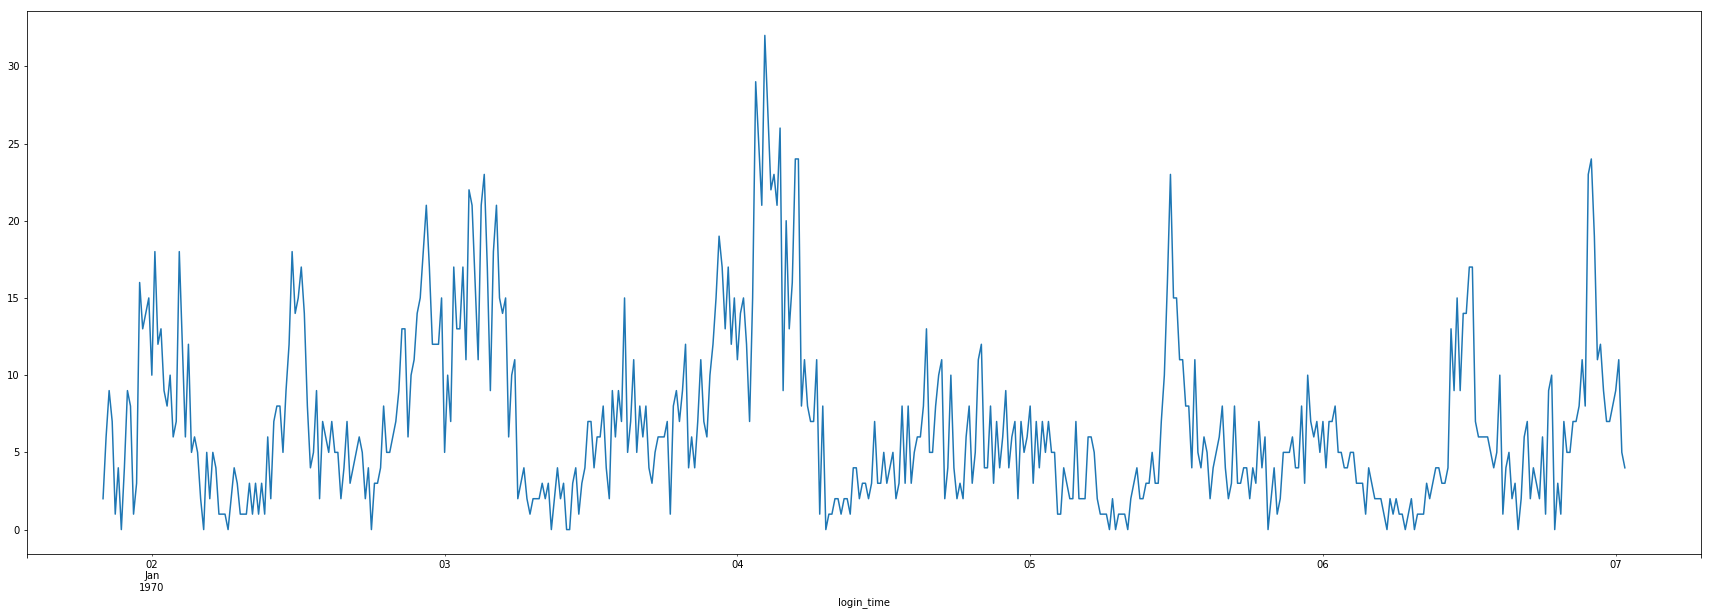

In [29]:
time_series = pd.Series(login['count'],index=login.index)
plt.figure(figsize=(30,10))
time_series[0:500].plot()

2nd Jan 1970 was a Friday, so for activities happening on the 3rd and 4th of January is the weekend, which shows the highest peak of the week

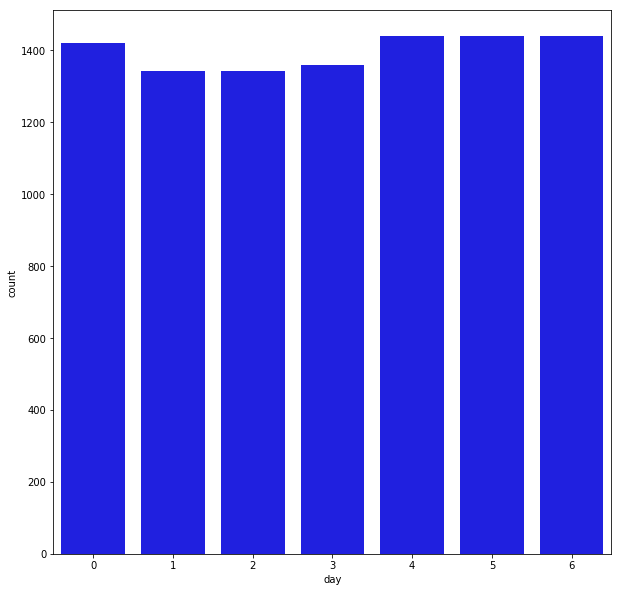

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x='day', data=login, color='blue')

Day 0 being Sunday, we can see that the following 3 days shows lower activities for the login

(array([719170., 719184., 719198., 719212., 719226., 719240., 719254.,
        719268.]), <a list of 8 Text xticklabel objects>)

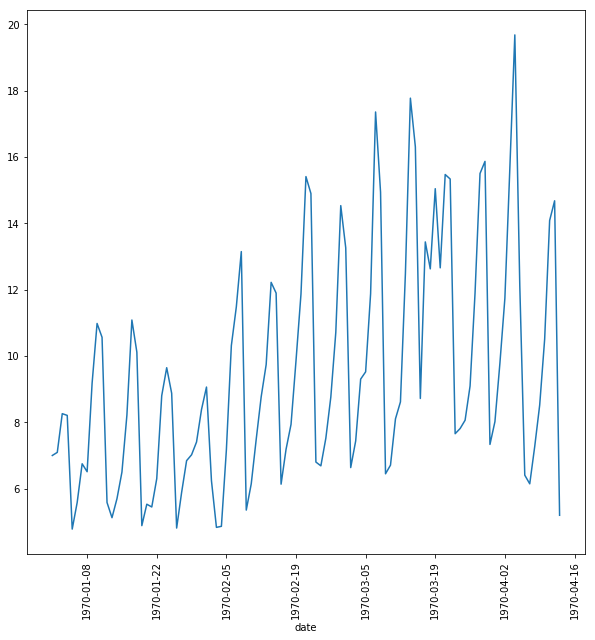

In [31]:
plt.figure(figsize=(10,10))
login.groupby('date').mean()['count'].plot()
plt.xticks(rotation='vertical')

Data shows a bi weekly interval, it can be seen above that between 1970 19th March to 1970 2nd April, there is an unusually large amount of activity going on

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

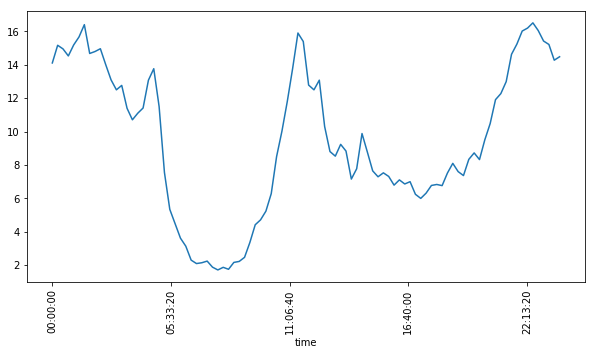

In [23]:
plt.figure(figsize=(10,5))
login.groupby('time')['count'].mean().plot()
plt.xticks(rotation='vertical')

To summarize the trend seen above, the peak logins happen every half day; the first peak is after midnight and the next peak is past noon. Then again login happens throughout the end of weekday and past the weekend, with the peark on Sunday. Activities past the season of Spring (March, April onwards) are when it reaches the highest peak.

# Part 2: Experiment and metric design.
The reimbursement news should first be put on notice between the bridges to change the pattern of the drivers driving past the cities. The policy can be implement with some sort of geolocation tracking device in their vehicle as a purpose of collecting their data and providing reimbursement based on the taken advantage. When these data is collected and collated into a file. We can then set a statistical test based on the travels between weekday and weekend. The size of the data collection is important to achieve a significance in the testing. This is an essential step into knowing whether the reimbursement step is cost effective and profitable for the toll bridges. Hypothesis testing for t-test can be done here to ensure the future of this program. Otherwise, have Batman stick all the trackers in the city :)

# Part 3 Predicive modelling

In [39]:
#opening a non object json file using with and convert to dataframe
with open('ultimate_data_challenge.json')as json_file:
    df=json.load(json_file)
dff= pd.DataFrame(df)
dff.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [47]:
dff.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

Missing data exist in this dataset. Let's try to avoid mixing up the null values with 0 ratings value. Hence we used a negative value of -1

In [48]:
dff['avg_rating_by_driver'].fillna(-1,inplace=True)
dff['avg_rating_of_driver'].fillna(-1,inplace=True)

Let's find out whether the active users a.k.a the Ultimate_black_users still exist as part of the retention. This can be determined using binary classification

In [53]:
black_user_count = []
for i in range(len(dff)):
    start = pd.Timestamp(dff['signup_date'][i])
    a = start + pd.Timedelta('181D') 
    b = a - pd.Timedelta('30D') 
    if b <= pd.Timestamp(dff['last_trip_date'][i]) <= a:
        black_user_count.append(1) 
    else:
        black_user_count.append(0)

dff['black_user_count'] = black_user_count

In [54]:
dff.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,black_user_count
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


With its feature and target variable ready, we can know perform a train test split to prepare the data for machine learning. Lets also make sure the LGBoost that runs with it has a optimized parameters

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
train,test = train_test_split(dff,test_size=0.2)
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', objective = 'binary', metric = 'AUC')

In [67]:
params = {'learning_rate': [0.1,0.2,0.5],'num_leaves': [40,60,80,100],'max_depth':[4,6,8,10]}
GS = GridSearchCV(mdl, params, verbose=1, cv=3, n_jobs=-1)

In [79]:
target_variable = train.drop(['black_user_count'], axis=1)
feature_variable = train['black_user_count']

In [ ]:
mdl =lgb.LGBMClassifier(boosting_type='gbdt', objective ='binary', metric ='AUC')
GS.fit(target_variable,feature_variable)
GS.best_params_
GS.best_score_

could not continue due to error:
'ValueError: DataFrame.dtypes for data must be int, float or bool. Did not expect the data types in fields last_session_creation_time'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
#plot feature importance
sns.barplot(features,mdl.feature_importances_,color='blue')

Conclusion: If the code runs, the resulting feature should give the metrics and AUC needed for comparison of the metrics with other prediction models that can be applied. The feature importance is also another indicator of which feature to include in order to optimize the accuract of the model. Judging by the features shown in dff. Surge_pct and weekday_pct seems like two factors affecting the retention rate of the Ultimate_black_users to stay active.